Task 3 - Background Spectrum

In [54]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import utils
import importlib
import json
importlib.reload(utils)
pd.set_option('display.max_rows', None)


Matplotlib imported as plt: <module 'matplotlib.pyplot' from 'c:\\Users\\kearb\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>


In [34]:
#Import the data for the background spectrum
file_path = r'Data\Task 3\background 8.0 uS.TKA'
background_dict, total_time = utils.import_data(file_path)


In [35]:
#Conversions for dataframe
#Channels > energy
#Counts > counts per second
calibration_file_path = r'Data\calibration_data.json'
with open(calibration_file_path, 'r') as json_file:
    calibration_data = json.load(json_file)
slope = calibration_data['slope']
intercept = calibration_data['intercept']

def channel_to_energy(channel, slope=slope, intercept=intercept):
    return slope * channel + intercept

background_dict['Energy (keV)'] = channel_to_energy(background_dict['Channel'])

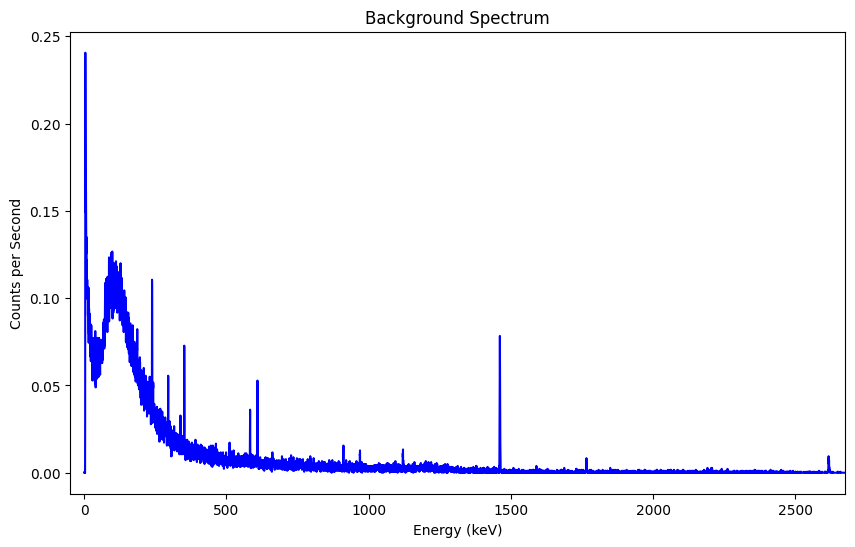

In [36]:
#Create a plot of the background spectrum
plt.figure(figsize=(10, 6))
plt.plot(background_dict['Energy (keV)'], background_dict['Counts per Second'], label='Background Spectrum', color='blue')
plt.title('Background Spectrum')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts per Second')
#plt.grid()
plt.xlim(left=-50, right=background_dict['Energy (keV)'].max())

plt.show()

In [39]:
print(f"Data type: {type(background_dict)}")

print(background_dict.keys())
#Print a chart of all the background_dict data
print(background_dict)

Data type: <class 'pandas.core.frame.DataFrame'>
Index(['Counts', 'Channel', 'Counts per Second', 'Energy (keV)'], dtype='object')
      Counts  Channel  Counts per Second  Energy (keV)
0          0        1           0.000000      0.561216
1          0        2           0.000000      0.887758
2          0        3           0.000000      1.214301
3          1        4           0.000556      1.540843
4          0        5           0.000000      1.867386
5          1        6           0.000556      2.193928
6          1        7           0.000556      2.520471
7          0        8           0.000000      2.847013
8         50        9           0.027778      3.173556
9        412       10           0.228889      3.500098
10       433       11           0.240556      3.826641
11       369       12           0.205000      4.153183
12       358       13           0.198889      4.479726
13       313       14           0.173889      4.806268
14       294       15           0.163333    

In [44]:
#Run the dataframe through the simple peak finder

peaks_dict = utils.find_peaks_simple(data={'Background': background_dict}, start_channel=1, channel_step=50, threshold_factor=2)

Data type: <class 'dict'>
Data keys: dict_keys(['Background'])
Peak found for Background at channel 11 with value 0.24055555555555555 (Max: 0.24055555555555555, Avg: 0.10433333333333333)
Duplicate peak found for Background at channel 11 with value 0.24055555555555555 (Max: 0.24055555555555555, Avg: 0.10245555555555556)
Peak found for Background at channel 729 with value 0.11055555555555556 (Max: 0.11055555555555556, Avg: 0.04358888888888889)
Duplicate peak found for Background at channel 729 with value 0.11055555555555556 (Max: 0.11055555555555556, Avg: 0.04331111111111111)


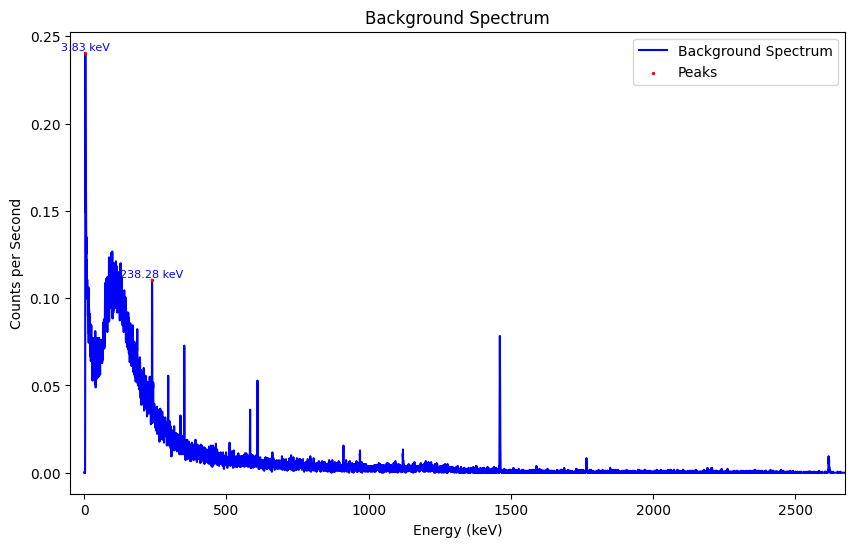

In [53]:
peak_energies = peaks_dict['Background']['Energy (keV)'].to_numpy()
peak_counts = peaks_dict['Background']['Counts per Second'].to_numpy()

plt.figure(figsize=(10, 6))
plt.plot(background_dict['Energy (keV)'], background_dict['Counts per Second'], label='Background Spectrum', color='blue')
plt.title('Background Spectrum')
plt.scatter(peak_energies, peak_counts, color='red', label="Peaks", zorder=5, s=2)  # Plot peaks as red dots
# Add labels for each peak
for x, y in zip(peak_energies, peak_counts):
    plt.text(x, y, f"{x:.2f} keV", fontsize=8, ha='center', va='bottom', color='blue')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts per Second')
plt.xlim(left=-50, right=background_dict['Energy (keV)'].max())
plt.legend()
plt.show()